# 02a AtBot ML Complete Data -- (Direct class label standardization from total data distribution)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import pickle 
import time 

from scipy import stats

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from sklearn.inspection import permutation_importance

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

from collections import Counter

import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
from atbotml.custom_fuctions import *

## Load data

In [2]:
df = pd.read_pickle("./01_AtBot_data.pkl")
print("Number of data samples:", len(df))
print("Number of features:", len(df.columns)-6)

f = open('01_AtDefenseGeneList.pkl', 'rb')
defense_list = pickle.load(f)
f.close()
print("Number of defense genes:", len(defense_list))

# extract feature names from RNASeq data
gene_names = list(df)[6:29107]

df

Number of data samples: 1092
Number of features: 29101
Number of defense genes: 130


,Index,LibraryID,HostGenoType,Sample,Isolate,Lesion,AT1G01010,AT1G01040,AT1G01046,AT1G01050,...,BCIN18G00020,BCIN18G00060,BCIN18G00145,BCIN18G00180,BCIN18G00190,EFBCT00000013145,EFBCT00000013262,EFBCT00000013292,ENSRNA049512921.T1,ENSRNA049513883.T1
0,coi1_1,coi.1.G1E.1,coi1,1,1.01.01,36.590004,39.556340,0.000000,0.000000,21.373592,...,0.0,0.000000,0.000000,0.000000,0.000000,12.438875,0.000000,0.000000,0.000000,5.321551
1,coi1_1,coi.1.G1F.1,coi1,1,1.01.01,36.590004,16.918722,0.000000,0.000000,119.029216,...,0.0,0.000000,0.000000,0.000000,0.000000,15.521645,0.000000,0.000000,0.000000,0.000000
2,coi1_1,coi.1.G2F.1,coi1,1,1.01.01,36.590004,14.735361,0.000000,0.000000,58.388002,...,0.0,0.000000,0.000000,0.000000,0.000000,76.250891,0.000000,0.000000,0.000000,0.000000
3,coi1_1,coi.1.G2E.1,coi1,1,1.01.01,36.590004,10.552052,0.000000,1.000161,19.548414,...,0.0,0.000000,0.000000,0.000000,0.000000,41.388120,73.847835,53.937879,0.000000,5.059001
4,coi1_10,coi.1.G2E.10,coi1,10,1.02.04,36.418731,15.229003,0.000000,0.000000,99.136624,...,0.0,15.577566,32.042486,0.000000,24.233666,47.555802,0.000000,54.228767,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,npr1_97,npr.1.G1F.972,npr1,97,1.05.16,20.747628,4.210585,0.226497,0.000000,88.664582,...,0.0,4.623277,12.227030,3.334425,16.953341,12.097817,0.000000,13.795366,0.000000,0.000000
1088,npr1_97,npr.1.G2E.971,npr1,97,1.05.16,20.747628,3.895372,0.000000,0.000000,18.900222,...,0.0,5.101576,16.951453,7.924833,14.651827,48.519908,11.222415,24.590291,1.537600,0.000000
1089,npr1_97,npr.1.G2E.972,npr1,97,1.05.16,20.747628,7.494782,0.000000,0.000000,14.318503,...,0.0,7.547289,19.236880,3.313311,15.314539,42.074248,18.768019,27.416028,0.642859,3.857151
1090,npr1_97,npr.1.G2F.971,npr1,97,1.05.16,20.747628,1.965208,0.000000,0.000000,23.361068,...,0.0,1.803102,16.690115,4.551550,37.868097,132.109896,103.127734,0.000000,0.000000,0.000000


## Notebook parameters

In [3]:
nb_id = '02a'
num_classes = 10
random_state = 42

## Direct standardize class labelling

count    1092.000000
mean       25.207050
std        13.257592
min         2.595268
25%        15.232061
50%        21.764053
75%        34.116404
max        68.466765
Name: Lesion, dtype: float64

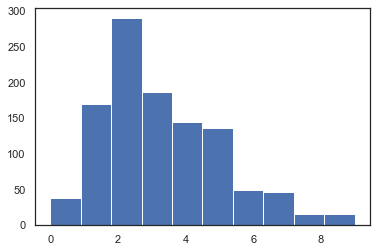

In [4]:
y_class, df_lesion, df_lesion_summary = direct_standardize_labelling(df, num_classes, min_zero=True)

plt.hist(y_class, bins=num_classes)
df_lesion_summary

## Full Data
### Data preprocessing

X: (1092, 29101)
y: DescribeResult(nobs=1092, minmax=(0.0, 9.0), mean=3.1675824175824174, variance=3.793155286510007, skewness=0.7767155496007653, kurtosis=0.20426355500519122)

x_train: (764, 29101)
x_test: (328, 29101)
y_train_class: DescribeResult(nobs=764, minmax=(0.0, 9.0), mean=3.1714659685863875, variance=3.8565372976607906, skewness=0.814490329127442, kurtosis=0.2548129166645796)
y_test_class: DescribeResult(nobs=328, minmax=(0.0, 9.0), mean=3.158536585365854, variance=3.6567464757216386, skewness=0.6797654272404324, kurtosis=0.06183390146578338)

Oversampled training data: 2060



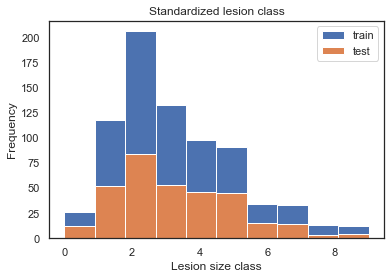

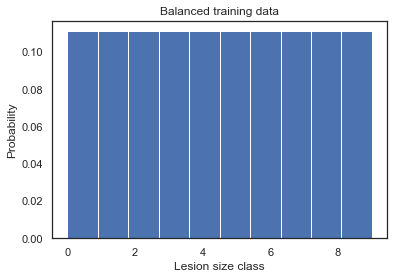

In [7]:
X_train, X_test, y_train, y_test, scaler = preprocess_AtBotData(df, standardize_label_func=direct_standardize_labelling, 
                                                        num_classes=num_classes, verbose="Info", show_figure=True, 
                                                        nb_id=nb_id, random_state=random_state)

### DNN

Classification accuracy is almost universally inappropriate for imbalanced classification.

For imbalanced classification problems, the *majority class* is typically referred to as the negative outcome (e.g. such as “no change” or “negative test result“), and the *minority class* is typically referred to as the positive outcome (e.g. “change” or “positive test result“).

**Sensitivity-Specificity Metrics** <br>
Sensitivity = TruePositive / (TruePositive + FalseNegative) *<br>
Specificity = TrueNegative / (FalsePositive + TrueNegative) <br>
G-Mean = sqrt(Sensitivity * Specificity)<br>




**Precision-Recall Metrics**<br>
Precision = TruePositive / (TruePositive + FalsePositive)<br>
Recall = TruePositive / (TruePositive + FalseNegative)<br>
F-Measure = (2 * Precision * Recall) / (Precision + Recall) *

In [6]:
model, history = train_dnn_1layer(X_train, y_train, X_test, y_test, num_classes, epochs=50)

Epoch 1/50
65/65 [==============================] - 4s 62ms/step - loss: 11.7501 - sparse_categorical_accuracy: 0.4761 - val_loss: 19.8084 - val_sparse_categorical_accuracy: 0.2470
Epoch 2/50
65/65 [==============================] - 4s 55ms/step - loss: 3.6906 - sparse_categorical_accuracy: 0.8394 - val_loss: 24.1323 - val_sparse_categorical_accuracy: 0.3171
Epoch 3/50
65/65 [==============================] - 3s 53ms/step - loss: 3.2153 - sparse_categorical_accuracy: 0.8728 - val_loss: 24.6111 - val_sparse_categorical_accuracy: 0.3415
Epoch 4/50
65/65 [==============================] - 3s 53ms/step - loss: 2.6527 - sparse_categorical_accuracy: 0.9164 - val_loss: 29.7797 - val_sparse_categorical_accuracy: 0.3262
Epoch 5/50
65/65 [==============================] - 3s 53ms/step - loss: 1.0716 - sparse_categorical_accuracy: 0.9340 - val_loss: 30.8858 - val_sparse_categorical_accuracy: 0.3445
Epoch 6/50
65/65 [==============================] - 3s 53ms/step - loss: 0.6745 - sparse_categorica

Save model

Accuracy:	 31.71%
Precision:	 25.98%
Recall:		 22.94%
F1 score:	 22.34%
INFO:tensorflow:Assets written to: ./models/02a_dnn_model/assets


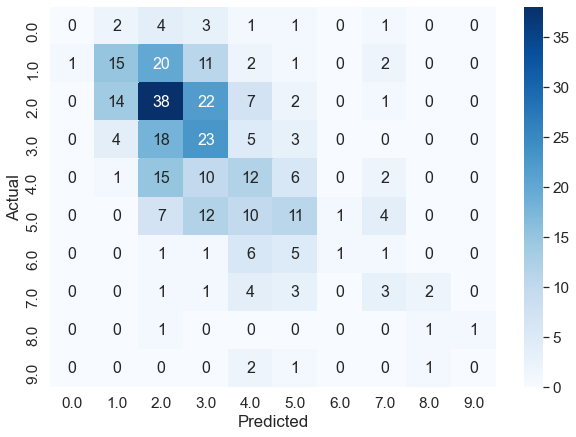

In [7]:
predictions = model.predict(X_test)
dnn_y_pred = np.argmax(predictions, 1)
dnn_score = get_sk_metrics(y_test, dnn_y_pred)
dnn_cm = plot_confusion_matrix(y_test, dnn_y_pred)

# save the keras model and results
filename = './models/' + nb_id + '_dnn_model'
model.save(filename)

filename = './models/' + nb_id + '_dnn_results.pkl'
pickle.dump([history.history, dnn_score, dnn_cm], open(filename, 'wb'))

#### Load DNN model and results

Accuracy:	 31.71%
Precision:	 25.98%
Recall:		 22.94%
F1 score:	 22.34%


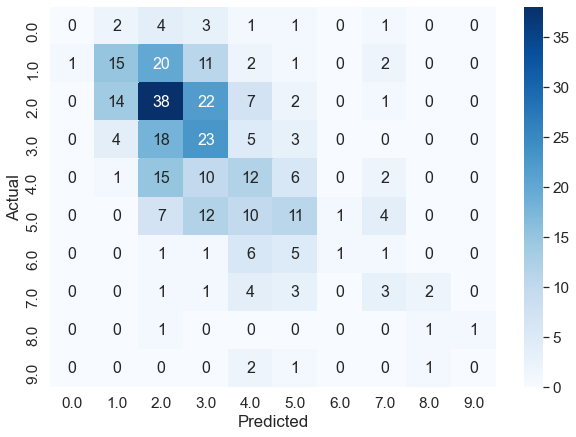

In [8]:
# load model and results
filename = './models/' + nb_id + '_dnn_model'
model = keras.models.load_model(filename)

filename = './models/' + nb_id + '_dnn_results.pkl'
history, dnn_score, dnn_cm = pickle.load(open(filename,'rb'))

predictions = model.predict(X_test)
dnn_y_pred = np.argmax(predictions, 1)
dnn_score = get_sk_metrics(y_test, dnn_y_pred)
dnn_cm = plot_confusion_matrix(y_test, dnn_y_pred)

### XGBoost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [9]:
xgb = XGBClassifier()

t0 = time.time()
xgb.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
elapsed time: 4.48 mins



Accuracy:	 35.06%
Precision:	 29.01%
Recall:		 29.20%
F1 score:	 28.20%


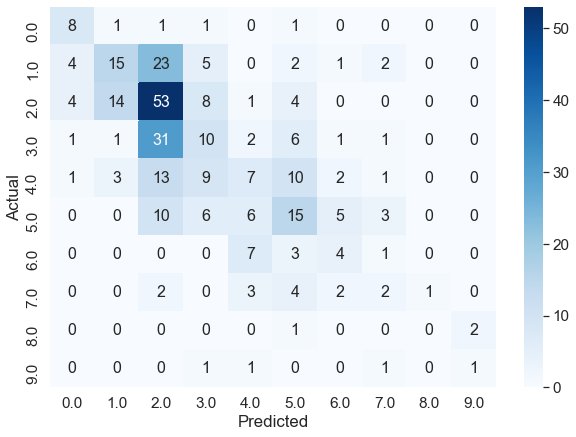

In [10]:
xgb_y_pred = xgb.predict(X_test)
xgb_score = get_sk_metrics(y_test, xgb_y_pred, average='macro')
xgb_cm = plot_confusion_matrix(y_test, xgb_y_pred)

filename = './models/' + nb_id + '_xgb_model_results.pkl'
pickle.dump([xgb, xgb_score, xgb_cm], open(filename, 'wb'))

#### Load XGBoost model and results

Accuracy:	 35.06%
Precision:	 29.01%
Recall:		 29.20%
F1 score:	 28.20%


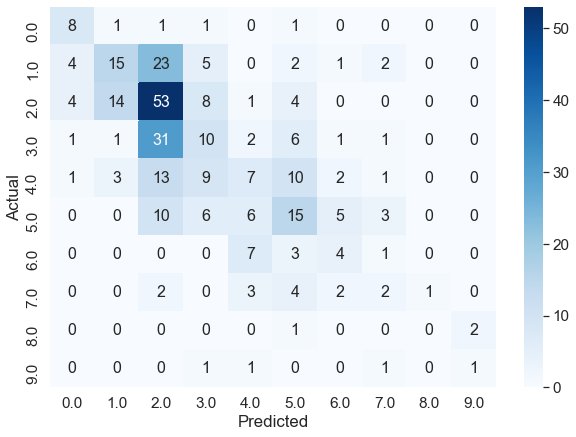

In [11]:
filename = './models/' + nb_id + '_xgb_model_results.pkl'
xgb, xgb_score, xgb_cm = pickle.load(open(filename,'rb'))

xgb_y_pred = xgb.predict(X_test)
xgb_score = get_sk_metrics(y_test, xgb_y_pred, average='macro')
xgb_cm = plot_confusion_matrix(y_test, xgb_y_pred)

### Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0)

t0 = time.time()
rf.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

elapsed time: 0.18 mins



Accuracy:	 32.32%
Precision:	 24.47%
Recall:		 24.16%
F1 score:	 23.92%


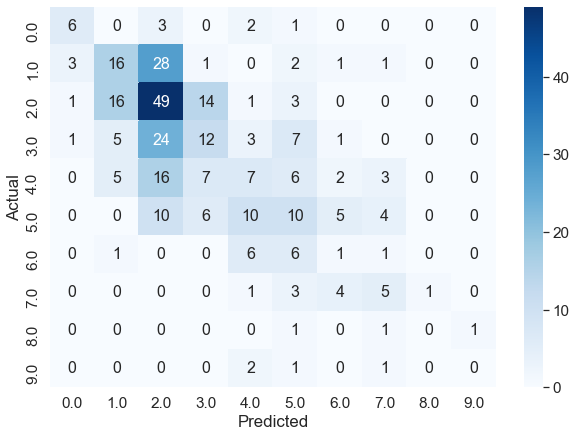

In [13]:
rf_y_pred = rf.predict(X_test)
rf_score = get_sk_metrics(y_test, rf_y_pred, average='macro')
rf_cm = plot_confusion_matrix(y_test, rf_y_pred)

filename = './models/' + nb_id + '_rf_model_results.pkl'
pickle.dump([rf, rf_score, rf_cm], open(filename, 'wb'))

#### Load RF model and results

Accuracy:	 32.32%
Precision:	 24.47%
Recall:		 24.16%
F1 score:	 23.92%


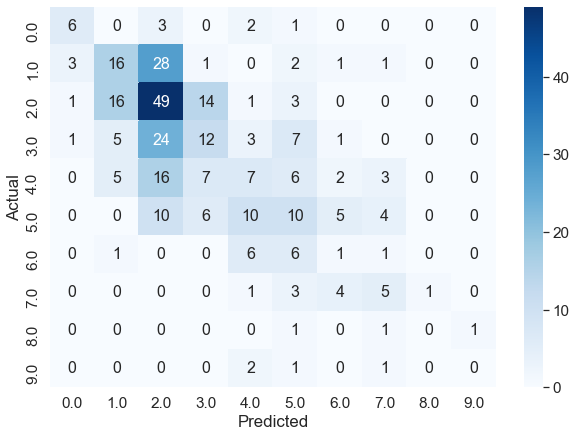

In [14]:
filename = './models/' + nb_id + '_rf_model_results.pkl'
rf, rf_score, rf_cm = pickle.load(open(filename,'rb'))

rf_y_pred = rf.predict(X_test)
rf_score = get_sk_metrics(y_test, rf_y_pred, average='macro')
rf_cm = plot_confusion_matrix(y_test, rf_y_pred)

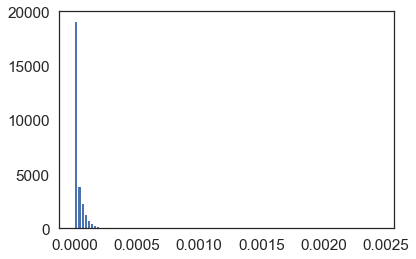

(29101,)

In [15]:
sns.set_style("white")

stats.describe(rf.feature_importances_)
plt.hist(rf.feature_importances_,bins=100)
plt.show()
rf.feature_importances_.shape

In [16]:
df_rf = pd.DataFrame({'gene': gene_names, 'importance': rf.feature_importances_})
df_rf_sorted = df_rf.sort_values(by=['importance'],ascending=False)

print("Top 10 genes by importance")
df_rf_sorted.head(10)

Top 10 genes by importance


,gene,importance
22909,BCIN04G03330,0.002443
12651,AT4G02230,0.002324
20433,BCIN01G01180,0.002317
26393,BCIN10G05840,0.002231
24094,BCIN06G03440,0.002074
21616,BCIN02G04780,0.001819
12609,AT4G01720,0.001677
8085,AT2G43530,0.001638
21649,BCIN02G05190,0.001549
23832,BCIN05G08330,0.001449


### SVM
#### RBF kernel

In [17]:
#Create a svm Classifier
svm = SVC() 

t0 = time.time()
svm.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

elapsed time: 1.89 mins



/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 31.40%
Precision:	 22.49%
Recall:		 18.96%
F1 score:	 19.00%


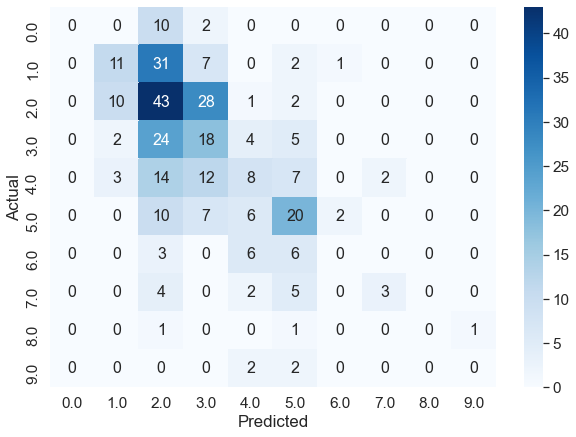

In [18]:
#Predict the response for test dataset
svm_y_pred = svm.predict(X_test)
svm_score = get_sk_metrics(y_test, svm_y_pred, average='macro')
svm_cm = plot_confusion_matrix(y_test, svm_y_pred)

filename = './models/' + nb_id + '_svm_model_results.pkl'
pickle.dump([svm, svm_score, svm_cm], open(filename, 'wb'))

##### Load SVM model and results

/Users/jayson/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:	 31.40%
Precision:	 22.49%
Recall:		 18.96%
F1 score:	 19.00%


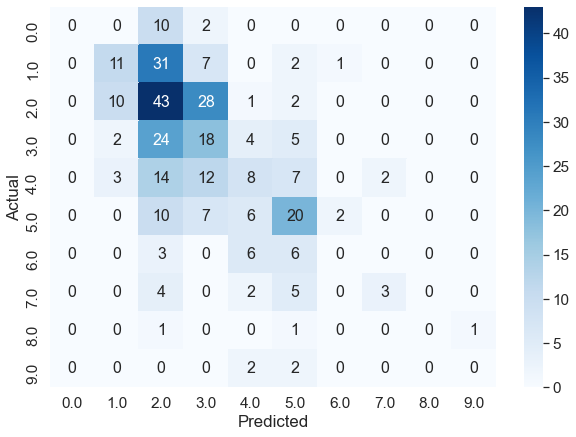

In [19]:
filename = './models/' + nb_id + '_svm_model_results.pkl'
svm, svm_score, svm_cm = pickle.load(open(filename,'rb'))

svm_y_pred = svm.predict(X_test)
svm_score = get_sk_metrics(y_test, svm_y_pred, average='macro')
svm_cm = plot_confusion_matrix(y_test, svm_y_pred)

#### Linear kernel

In [20]:
from sklearn.svm import SVC

#Create a svm Classifier
svm_lin = SVC(kernel='linear') # Linear Kernel

t0 = time.time()
#Train the model using the training sets
svm_lin.fit(X_train, y_train)
t = time.time() - t0

print("elapsed time: %.2f mins" % (t/60))
print()

elapsed time: 1.27 mins



Accuracy:	 37.20%
Precision:	 31.28%
Recall:		 25.75%
F1 score:	 27.02%


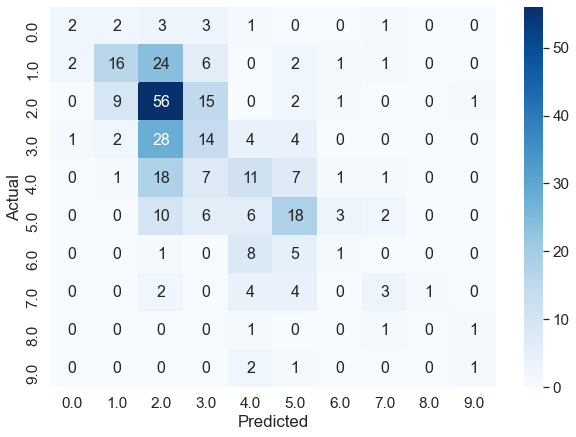

In [21]:
svm_lin_y_pred = svm_lin.predict(X_test)
svm_lin_score = get_sk_metrics(y_test, svm_lin_y_pred, average='macro')
svm_lin_cm = plot_confusion_matrix(y_test, svm_lin_y_pred)

filename = './models/' + nb_id + '_svm_lin_model_results.pkl'
pickle.dump([svm_lin, svm_lin_score, svm_lin_cm], open(filename, 'wb'))

##### Load SVM (linear) model and results

Accuracy:	 37.20%
Precision:	 31.28%
Recall:		 25.75%
F1 score:	 27.02%


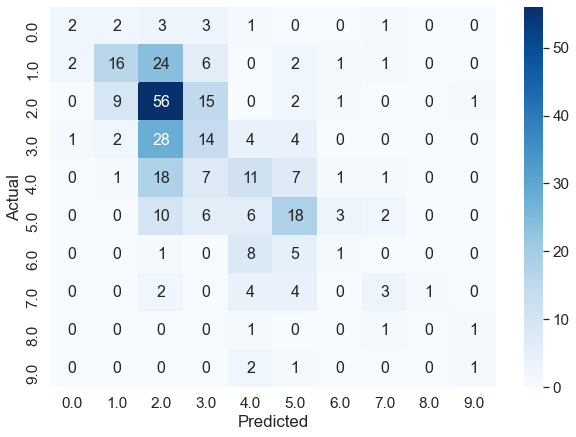

In [22]:
filename = './models/' + nb_id + '_svm_lin_model_results.pkl'
svm_lin, svm_lin_score, svm_lin_cm = pickle.load(open(filename,'rb'))

svm_lin_y_pred = svm_lin.predict(X_test)
svm_lin_score = get_sk_metrics(y_test, svm_lin_y_pred, average='macro')
svm_lin_cm = plot_confusion_matrix(y_test, svm_lin_y_pred)

## Prediction
### Arabidopsis mock data

In [23]:
model, score, cm, dnn_history = fetch_data_metrics(nb_id)
print(f'Loading results from nb_id: {nb_id}')

Loading results from nb_id: 02a


In [24]:
df_mock = pd.read_csv("../data/raw/AtBcMicroArray2012/AtBc16hpiMock_2012_IDConver.csv")

mock_features = df_mock.loc[:,'GeneID']
mock_features.to_list()

print(f'Number of features: {len(mock_features)}')
print(f'Unique features: {len(set(mock_features))}')

ugene_names = [each_string.upper() for each_string in gene_names]
common_features = set(mock_features) & set(ugene_names)
print(f'Intersection: {len(common_features)}')

cols = df.columns.to_list()
cols = cols[6:]
df2 = pd.DataFrame(columns=cols)
df2.loc[len(df2)] = 0

mock_gene_list = df_mock['GeneID'].to_list()

for gene in common_features:
    df2.loc[0,gene] = df_mock.loc[df_mock['GeneID'] == gene,'Microarray'].values[0]

df2

Number of features: 8451
Unique features: 8451
Intersection: 6258


,AT1G01010,AT1G01040,AT1G01046,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01120,...,BCIN18G00020,BCIN18G00060,BCIN18G00145,BCIN18G00180,BCIN18G00190,EFBCT00000013145,EFBCT00000013262,EFBCT00000013292,ENSRNA049512921.T1,ENSRNA049513883.T1
0,8.35831,9.66163,0,11.7786,13.7404,9.87373,12.7658,13.5249,15.2032,11.014,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# X_test = df2.loc[0].to_numpy(dtype='float')
X_test = df2.values
X_test = X_test.astype('float')

X_test_scaled = scaler.transform(X_test)

predictions = model['dnn'].predict(X_test_scaled)
dnn_y_pred = np.argmax(predictions, 1)
xgb_y_pred = model['xgb'].predict(X_test_scaled)
rf_y_pred = model['rf'].predict(X_test_scaled)
svm_y_pred = model['svm'].predict(X_test_scaled)
svm_lin_y_pred = model['svm_lin'].predict(X_test_scaled)

print(f'DNN predicted class: {dnn_y_pred}')
print(f'XGB predicted class: {xgb_y_pred}')
print(f'RF predicted class: {rf_y_pred}')
print(f'SVM predicted class: {svm_y_pred}')
print(f'linSVM predicted class: {svm_lin_y_pred}')

DNN predicted class: [4]
XGB predicted class: [4.]
RF predicted class: [4.]
SVM predicted class: [2.]
linSVM predicted class: [5.]


In [26]:
X_test_scaled[0,0:10]

array([-0.6947002 , 30.58408175, -0.36931092, -1.29724961, 26.46943512,
        4.74417724, 14.13672273, -3.07866343,  3.34121736, -1.06339099])

### Arabidopsis infection data

In [27]:
df_infect = pd.read_csv("../data/raw/AtBcMicroArray2012/AtBc16hpiInfe_2012_IDConver.csv")

infect_features = df_infect.loc[:,'GeneID']
infect_features.to_list()

print(f'Number of features: {len(infect_features)}')
print(f'Unique features: {len(set(infect_features))}')

ugene_names = [each_string.upper() for each_string in gene_names]
common_features = set(infect_features) & set(ugene_names)
print(f'Intersection: {len(common_features)}')

cols = df.columns.to_list()
cols = cols[6:]
df2 = pd.DataFrame(columns=cols)
df2.loc[len(df2)] = 0

infect_gene_list = df_infect['GeneID'].to_list()

for gene in common_features:
    df2.loc[0,gene] = df_infect.loc[df_infect['GeneID'] == gene,'Microarray'].values[0]

df2

Number of features: 8451
Unique features: 8451
Intersection: 6258


,AT1G01010,AT1G01040,AT1G01046,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01120,...,BCIN18G00020,BCIN18G00060,BCIN18G00145,BCIN18G00180,BCIN18G00190,EFBCT00000013145,EFBCT00000013262,EFBCT00000013292,ENSRNA049512921.T1,ENSRNA049513883.T1
0,8.40889,10.0098,0,11.977,13.186,10.3102,12.4903,12.867,14.9606,10.507,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# X_test = df2.loc[0].to_numpy(dtype='float')
X_test = df2.values
X_test = X_test.astype('float')

X_test_scaled = scaler.transform(X_test)

predictions = model['dnn'].predict(X_test_scaled)
dnn_y_pred = np.argmax(predictions, 1)
xgb_y_pred = model['xgb'].predict(X_test_scaled)
rf_y_pred = model['rf'].predict(X_test_scaled)
svm_y_pred = model['svm'].predict(X_test_scaled)
svm_lin_y_pred = model['svm_lin'].predict(X_test_scaled)

print(f'DNN predicted class: {dnn_y_pred}')
print(f'XGB predicted class: {xgb_y_pred}')
print(f'RF predicted class: {rf_y_pred}')
print(f'SVM predicted class: {svm_y_pred}')
print(f'linSVM predicted class: {svm_lin_y_pred}')

DNN predicted class: [4]
XGB predicted class: [4.]
RF predicted class: [4.]
SVM predicted class: [2.]
linSVM predicted class: [5.]


In [29]:
X_test_scaled[0,0:10]

array([-0.69126045, 31.69731037, -0.36931092, -1.29178521, 25.38878534,
        4.97747579, 13.82324351, -3.09317966,  3.28268255, -1.0726458 ])

## Domain Knowledge
### Defense List

Number of defense genes: 130
X: (1092, 130)
y: DescribeResult(nobs=1092, minmax=(0.0, 9.0), mean=3.1675824175824174, variance=3.793155286510007, skewness=0.7767155496007653, kurtosis=0.20426355500519122)

x_train: (764, 130)
x_test: (328, 130)
y_train_class: DescribeResult(nobs=764, minmax=(0.0, 9.0), mean=3.217277486910995, variance=3.8688491968188403, skewness=0.7451996985262938, kurtosis=0.12793843780990466)
y_test_class: DescribeResult(nobs=328, minmax=(0.0, 9.0), mean=3.051829268292683, variance=3.6089263071529807, skewness=0.8503389655148067, kurtosis=0.40542479513931573)

Oversampled training data: 2040



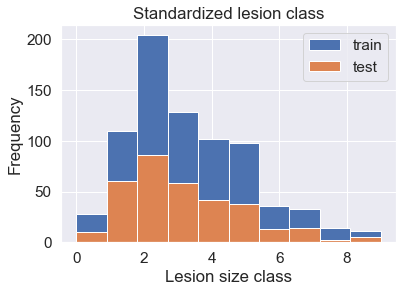

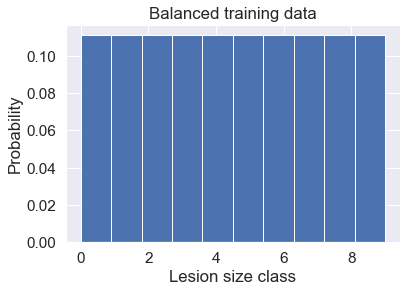

ValueError: too many values to unpack (expected 4)

In [30]:
# print("Number of defense genes:", len(defense_list))
# X_train, X_test, y_train, y_test = preprocess_AtBotData(df, standardize_label_func=direct_standardize_labelling, features_filter=defense_list, 
#                                                         num_classes=num_classes, verbose="Info", show_figure=True, nb_id=nb_id)
# X_train.shape

#### DNN

In [ ]:
model, history = train_dnn_1layer(X_train, y_train, X_test, y_test, num_classes, epochs=50)

In [ ]:
predictions = model.predict(X_test)
dnn_def_y_pred = np.argmax(predictions, 1)
dnn_def_score = get_sk_metrics(y_test, dnn_def_y_pred)
dnn_def_cm = plot_confusion_matrix(y_test, dnn_def_y_pred)

# save the keras model and results
filename = './models/' + nb_id + '_def_dnn_model'
model.save(filename)

filename = './models/' + nb_id + '_def_dnn_results.pkl'
pickle.dump([history.history, dnn_def_score, dnn_def_cm], open(filename, 'wb'))

##### Load DNN model and results

In [ ]:
# load model and results
filename = './models/' + nb_id + '_def_dnn_model'
model = keras.models.load_model(filename)

filename = './models/' + nb_id + '_def_dnn_results.pkl'
history, dnn_score, dnn_cm = pickle.load(open(filename,'rb'))

predictions = model.predict(X_test)
dnn_def_y_pred = np.argmax(predictions, 1)
dnn_def_score = get_sk_metrics(y_test, dnn_def_y_pred)
dnn_def_cm = plot_confusion_matrix(y_test, dnn_def_y_pred)

In [ ]:
plt.plot(history['sparse_categorical_accuracy'])
plt.plot(history['val_sparse_categorical_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Train/Test accuracy')
plt.legend(['Train','Test'])

## Plots
### Performance metrics

**Precision** is a measure of the ability of a classification model to identify only the relevant data points.<br>
**Recall** is a measure of the ability of a model to find all the relevant cases within a dataset.

Saving to ./figures/02a_AtBotComplete_score_class10.pdf



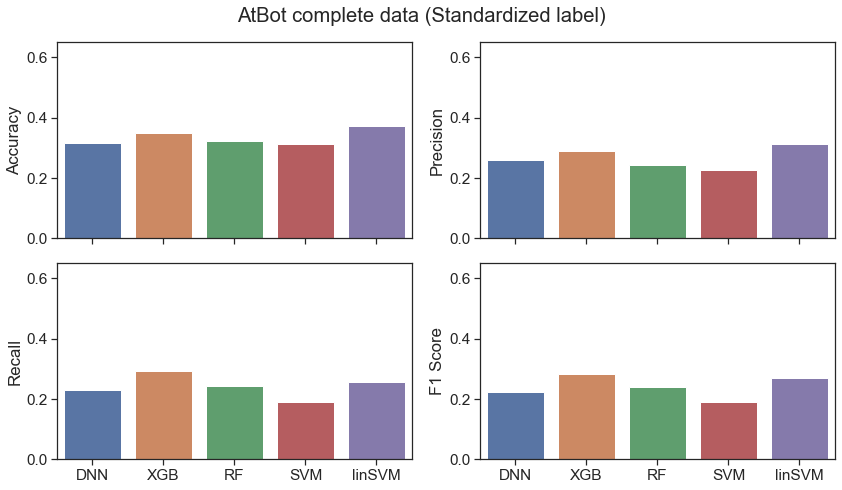

,Accuracy,Precision,Recall,F1 Score
DNN,0.317073,0.259820,0.229440,0.223359
XGB,0.350610,0.290128,0.291979,0.281954
RF,0.323171,0.244715,0.241565,0.239167
SVM,0.314024,0.224933,0.189571,0.189962
linSVM,0.371951,0.312764,0.257526,0.270199


In [32]:
max_ylim = 0.65
file_out = f'./figures/{nb_id}_AtBotComplete_score_class{num_classes}.pdf'
fig_title = 'AtBot complete data (Standardized label)'
# df_metrics = plot_performance_metrics(nb_id, max_ylim, file_out, fig_title)
df_metrics = plot_performance_metrics(nb_id, max_ylim, file_out, fig_title)
df_metrics

#### Fuzzy results

../atbotml/custom_fuctions.py:245: RuntimeWarning: invalid value encountered in long_scalars
  fuzzy_precision[i] = np.sum(cmT[i, min_idx:max_idx + 1]) / np.sum(cmT[i])


Saving to ./figures/02a_AtBotComplete_fuzzy_score_class10.pdf



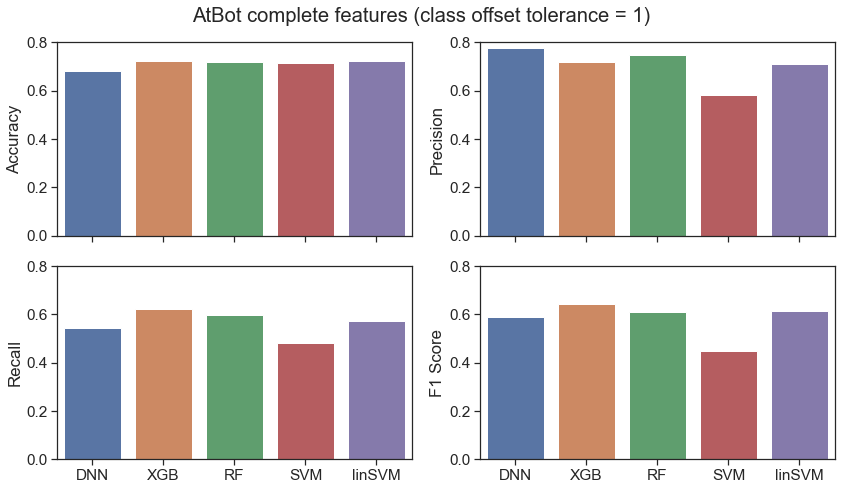

,Accuracy,Precision,Recall,F1 Score
DNN,0.679878,0.775097,0.544591,0.589581
XGB,0.722561,0.719884,0.621201,0.641255
RF,0.719512,0.749108,0.598480,0.608467
SVM,0.713415,0.583883,0.479670,0.450226
linSVM,0.722561,0.711423,0.570719,0.612871


In [33]:
max_ylim = 0.8
offset = 1
file_out = f'./figures/{nb_id}_AtBotComplete_fuzzy_score_class{num_classes}.pdf'
fig_title = f'AtBot complete features (class offset tolerance = {offset})'
df_metrics = plot_performance_metrics(nb_id, max_ylim, file_out, fig_title, offset)
df_metrics

In [34]:
total_class_mse, class_mse, class_rss = class_error(dnn_cm)
total_class_mse

2.9115853658536586

Saving to ./figures/02a_AtBotComplete_mse_class10.pdf



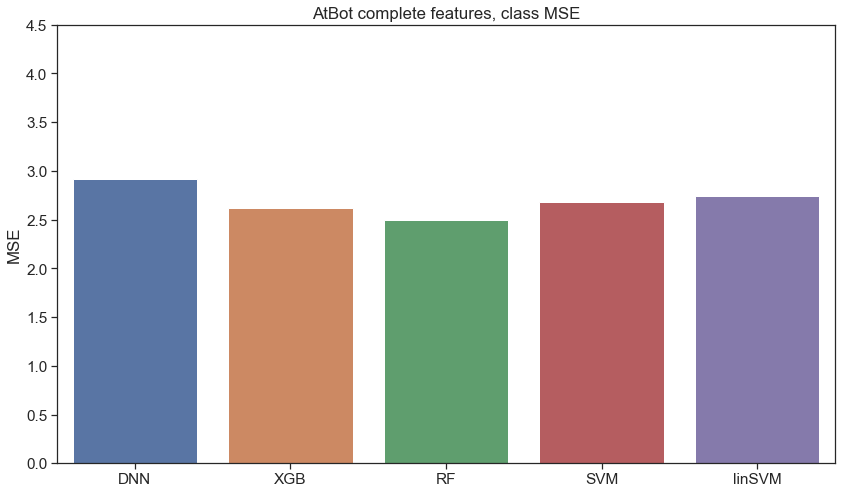

,MSE
DNN,2.911585
XGB,2.621951
RF,2.500000
SVM,2.682927
linSVM,2.743902


In [38]:
max_ylim = 4.5
file_out = f'./figures/{nb_id}_AtBotComplete_mse_class{num_classes}.pdf'
fig_title = f'AtBot complete features, class MSE'
df_metrics = plot_mse(nb_id, max_ylim, file_out, fig_title)
df_metrics

## Others